## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
X_train = X_train / 255.
X_test = X_test / 255.

# Flatten the images (multiple-dimension to 2 dimesion)
X_train = X_train.reshape((len(X_train), -1))
X_test = X_test.reshape((len(X_test), -1))
# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 3072) (50000, 10) (10000, 3072) (10000, 10)


In [7]:
def build_mlp():
    input_layer = keras.layers.Input([X_train.shape[-1]])
    x1 = keras.layers.Dense(512, activation="relu")(input_layer)
    x2 = keras.layers.Dense(256, activation="relu")(x1)
    x3 = keras.layers.Dense(128, activation="relu")(x2)
    output = keras.layers.Dense(10, activation="softmax")(x3)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output])
    return model  

In [8]:
"""
Compile your model
"""
optimizer = keras.optimizers.Adam(lr=0.001)
epochs = 500

model = build_mlp()

model.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])


print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
history = model.fit(X_train, y_train, 
                  epochs=epochs,
                  batch_size=256, 
                  validation_data=(X_test, y_test), 
                  shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 14s 272us/step - loss: 1.9559 - acc: 0.2939 - val_loss: 1.7572 - val_acc: 0.3685
Epoch 2/500
50000/50000 [==============================] - 14s 279us/step - loss: 1.7077 - acc: 0.3886 - val_loss: 1.6848 - val_acc: 0.4013
Epoch 3/500
50000/50000 [==============================] - 14s 275us/step - loss: 1.6231 - acc: 0.4215 - val_loss: 1.5850 - val_acc: 0.4362
Epoch 4/500
50000/50000 [==============================] - 14s 274us/step - loss: 1.5520 - acc: 0.4470 - val_loss: 1.5591 - val_acc: 0.4326
Epoch 5/500
50000/50000 [==============================] - 14s 271us/step - loss: 1.5111 - acc: 0.4608 - val_loss: 1.5423 - val_acc: 0.4531
Epoch 6/500
50000/50000 [==============================] - 13s 268us/step - loss: 1.4692 - acc: 0.4769 - val_loss: 1.5052 - val_acc: 0.4724
Epoch 7/500
50000/50000 [==============================] - 14s

Epoch 57/500
50000/50000 [==============================] - 12s 239us/step - loss: 0.5901 - acc: 0.7892 - val_loss: 1.8857 - val_acc: 0.5109
Epoch 58/500
50000/50000 [==============================] - 12s 240us/step - loss: 0.5941 - acc: 0.7861 - val_loss: 1.9974 - val_acc: 0.5064
Epoch 59/500
50000/50000 [==============================] - 12s 236us/step - loss: 0.5720 - acc: 0.7968 - val_loss: 1.9473 - val_acc: 0.5124
Epoch 60/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.5524 - acc: 0.8019 - val_loss: 2.0356 - val_acc: 0.5101
Epoch 61/500
50000/50000 [==============================] - 12s 240us/step - loss: 0.5480 - acc: 0.8037 - val_loss: 2.0390 - val_acc: 0.5130
Epoch 62/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.5387 - acc: 0.8072 - val_loss: 2.1442 - val_acc: 0.5063
Epoch 63/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.5196 - acc: 0.8135 - val_loss: 2.0925 - val_acc: 0.5049
Epoch 64/500


Epoch 115/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.3006 - acc: 0.8927 - val_loss: 3.2882 - val_acc: 0.4971
Epoch 116/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.2706 - acc: 0.9027 - val_loss: 3.3351 - val_acc: 0.5069
Epoch 117/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.2688 - acc: 0.9022 - val_loss: 3.3450 - val_acc: 0.5044
Epoch 118/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.2366 - acc: 0.9158 - val_loss: 3.3981 - val_acc: 0.4969
Epoch 119/500
50000/50000 [==============================] - 12s 239us/step - loss: 0.2553 - acc: 0.9086 - val_loss: 3.4585 - val_acc: 0.4885
Epoch 120/500
50000/50000 [==============================] - 12s 239us/step - loss: 0.2832 - acc: 0.8989 - val_loss: 3.4303 - val_acc: 0.4937
Epoch 121/500
50000/50000 [==============================] - 12s 232us/step - loss: 0.2445 - acc: 0.9108 - val_loss: 3.5034 - val_acc: 0.4890
Epoch 

Epoch 173/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.2143 - acc: 0.9252 - val_loss: 4.1969 - val_acc: 0.4878
Epoch 174/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.2141 - acc: 0.9249 - val_loss: 4.1342 - val_acc: 0.4807
Epoch 175/500
50000/50000 [==============================] - 12s 234us/step - loss: 0.1576 - acc: 0.9439 - val_loss: 4.1279 - val_acc: 0.4939
Epoch 176/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.2369 - acc: 0.9176 - val_loss: 4.0905 - val_acc: 0.4855
Epoch 177/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.1562 - acc: 0.9445 - val_loss: 4.1818 - val_acc: 0.4927
Epoch 178/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.1558 - acc: 0.9441 - val_loss: 4.1707 - val_acc: 0.4968
Epoch 179/500
50000/50000 [==============================] - 12s 234us/step - loss: 0.1560 - acc: 0.9446 - val_loss: 4.1494 - val_acc: 0.4971
Epoch 

Epoch 231/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.1484 - acc: 0.9483 - val_loss: 4.5654 - val_acc: 0.4906
Epoch 232/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.1518 - acc: 0.9463 - val_loss: 4.6213 - val_acc: 0.4869
Epoch 233/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.1369 - acc: 0.9525 - val_loss: 4.5859 - val_acc: 0.4865
Epoch 234/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.1173 - acc: 0.9578 - val_loss: 4.5993 - val_acc: 0.4939
Epoch 235/500
50000/50000 [==============================] - 12s 239us/step - loss: 0.1566 - acc: 0.9465 - val_loss: 4.7083 - val_acc: 0.4856
Epoch 236/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.1205 - acc: 0.9584 - val_loss: 4.6676 - val_acc: 0.4892
Epoch 237/500
50000/50000 [==============================] - 12s 232us/step - loss: 0.1237 - acc: 0.9572 - val_loss: 4.5579 - val_acc: 0.4932
Epoch 

50000/50000 [==============================] - 13s 266us/step - loss: 0.0849 - acc: 0.9722 - val_loss: 4.9754 - val_acc: 0.4864
Epoch 289/500
50000/50000 [==============================] - 13s 270us/step - loss: 0.2319 - acc: 0.9274 - val_loss: 4.7806 - val_acc: 0.4835
Epoch 290/500
50000/50000 [==============================] - 14s 270us/step - loss: 0.1750 - acc: 0.9423 - val_loss: 4.8361 - val_acc: 0.4908
Epoch 291/500
50000/50000 [==============================] - 14s 271us/step - loss: 0.1062 - acc: 0.9639 - val_loss: 4.8329 - val_acc: 0.4903
Epoch 292/500
50000/50000 [==============================] - 14s 270us/step - loss: 0.0949 - acc: 0.9672 - val_loss: 4.9063 - val_acc: 0.4881
Epoch 293/500
50000/50000 [==============================] - 14s 272us/step - loss: 0.1110 - acc: 0.9626 - val_loss: 4.8290 - val_acc: 0.4893
Epoch 294/500
50000/50000 [==============================] - 13s 269us/step - loss: 0.0894 - acc: 0.9684 - val_loss: 4.8672 - val_acc: 0.4909
Epoch 295/500
50000/

Epoch 346/500
50000/50000 [==============================] - 16s 324us/step - loss: 0.2204 - acc: 0.9332 - val_loss: 5.0381 - val_acc: 0.4830
Epoch 347/500
50000/50000 [==============================] - 16s 310us/step - loss: 0.1258 - acc: 0.9580 - val_loss: 5.0477 - val_acc: 0.4841
Epoch 348/500
50000/50000 [==============================] - 15s 299us/step - loss: 0.1367 - acc: 0.9540 - val_loss: 5.0372 - val_acc: 0.4889
Epoch 349/500
50000/50000 [==============================] - 15s 292us/step - loss: 0.0998 - acc: 0.9659 - val_loss: 5.0559 - val_acc: 0.4873
Epoch 350/500
50000/50000 [==============================] - 14s 275us/step - loss: 0.0760 - acc: 0.9737 - val_loss: 5.0421 - val_acc: 0.4936
Epoch 351/500
50000/50000 [==============================] - 14s 274us/step - loss: 0.0531 - acc: 0.9822 - val_loss: 5.1351 - val_acc: 0.4916
Epoch 352/500
50000/50000 [==============================] - 14s 283us/step - loss: 0.0676 - acc: 0.9769 - val_loss: 5.1033 - val_acc: 0.4927
Epoch 

Epoch 404/500
50000/50000 [==============================] - 14s 274us/step - loss: 0.0575 - acc: 0.9811 - val_loss: 5.0135 - val_acc: 0.4923
Epoch 405/500
50000/50000 [==============================] - 13s 261us/step - loss: 0.0444 - acc: 0.9850 - val_loss: 5.0449 - val_acc: 0.4939
Epoch 406/500
50000/50000 [==============================] - 13s 257us/step - loss: 0.0736 - acc: 0.9747 - val_loss: 5.0956 - val_acc: 0.4895
Epoch 407/500
50000/50000 [==============================] - 13s 259us/step - loss: 0.0934 - acc: 0.9693 - val_loss: 5.0497 - val_acc: 0.4918
Epoch 408/500
50000/50000 [==============================] - 14s 270us/step - loss: 0.1363 - acc: 0.9546 - val_loss: 5.1866 - val_acc: 0.4807
Epoch 409/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.1390 - acc: 0.9533 - val_loss: 5.1115 - val_acc: 0.4883
Epoch 410/500
50000/50000 [==============================] - 13s 261us/step - loss: 0.0889 - acc: 0.9699 - val_loss: 5.1045 - val_acc: 0.4938
Epoch 

Epoch 462/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.0224 - acc: 0.9941 - val_loss: 4.9951 - val_acc: 0.4929
Epoch 463/500
50000/50000 [==============================] - 14s 286us/step - loss: 0.0089 - acc: 0.9992 - val_loss: 4.9799 - val_acc: 0.4981
Epoch 464/500
50000/50000 [==============================] - 14s 286us/step - loss: 0.0061 - acc: 0.9997 - val_loss: 5.0443 - val_acc: 0.4978
Epoch 465/500
50000/50000 [==============================] - 15s 290us/step - loss: 0.0049 - acc: 0.9998 - val_loss: 5.0419 - val_acc: 0.5030
Epoch 466/500
50000/50000 [==============================] - 14s 287us/step - loss: 0.0041 - acc: 0.9999 - val_loss: 5.0784 - val_acc: 0.5002
Epoch 467/500
50000/50000 [==============================] - 15s 294us/step - loss: 0.0038 - acc: 0.9999 - val_loss: 5.1132 - val_acc: 0.5018
Epoch 468/500
50000/50000 [==============================] - 15s 290us/step - loss: 0.1417 - acc: 0.9670 - val_loss: 5.3921 - val_acc: 0.4490
Epoch 

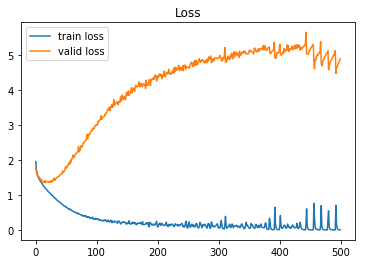

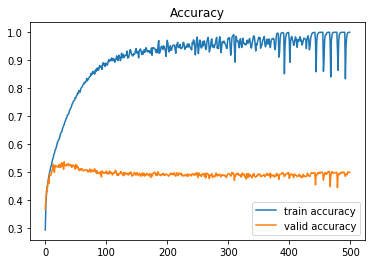

In [12]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend(loc='best')
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend(loc='best')
plt.title("Accuracy")
plt.show()

In [13]:
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", 
              metrics=["accuracy"], optimizer=optimizer)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
history = model.fit(X_train, y_train, 
                  epochs=epochs,
                  batch_size=256, 
                  validation_data=(X_test, y_test), 
                  shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 4.8883 - val_acc: 0.4981
Epoch 2/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 4.8879 - val_acc: 0.4989
Epoch 3/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 4.8878 - val_acc: 0.4992
Epoch 4/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 4.8879 - val_acc: 0.4990
Epoch 5/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 4.8881 - val_acc: 0.4993
Epoch 6/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 4.8884 - val_acc: 0.4993
Epoch 7/500
50000/50000 [==============================] - 10s 204us/step - loss: 0.0035 - acc: 1.0000 - val_los

Epoch 59/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 4.9166 - val_acc: 0.5006
Epoch 60/500
50000/50000 [==============================] - 10s 194us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 4.9172 - val_acc: 0.5006
Epoch 61/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 4.9178 - val_acc: 0.5005
Epoch 62/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 4.9183 - val_acc: 0.5007
Epoch 63/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 4.9188 - val_acc: 0.5007
Epoch 64/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 4.9193 - val_acc: 0.5007
Epoch 65/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 4.9198 - val_acc: 0.5007
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.9456 - val_acc: 0.5019
Epoch 118/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.9461 - val_acc: 0.5020
Epoch 119/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.9466 - val_acc: 0.5020
Epoch 120/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.9470 - val_acc: 0.5020
Epoch 121/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.9475 - val_acc: 0.5020
Epoch 122/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.9480 - val_acc: 0.5019
Epoch 123/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.9485 - val_acc: 0.5019
Epoch 

Epoch 175/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 4.9712 - val_acc: 0.5020
Epoch 176/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 4.9716 - val_acc: 0.5020
Epoch 177/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 4.9720 - val_acc: 0.5020
Epoch 178/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 4.9724 - val_acc: 0.5021
Epoch 179/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 4.9729 - val_acc: 0.5024
Epoch 180/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 4.9733 - val_acc: 0.5024
Epoch 181/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 4.9737 - val_acc: 0.5024
Epoch 182/500

Epoch 233/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 4.9943 - val_acc: 0.5026
Epoch 234/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 4.9947 - val_acc: 0.5028
Epoch 235/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 4.9951 - val_acc: 0.5026
Epoch 236/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 4.9955 - val_acc: 0.5026
Epoch 237/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 4.9959 - val_acc: 0.5026
Epoch 238/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 4.9962 - val_acc: 0.5026
Epoch 239/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 4.9966 - val_acc: 0.5026
Epoch 240/500

Epoch 291/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 5.0156 - val_acc: 0.5033
Epoch 292/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 5.0159 - val_acc: 0.5033
Epoch 293/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 5.0162 - val_acc: 0.5034
Epoch 294/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 5.0165 - val_acc: 0.5034
Epoch 295/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 5.0169 - val_acc: 0.5033
Epoch 296/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 5.0172 - val_acc: 0.5033
Epoch 297/500
50000/50000 [==============================] - 9s 190us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 5.0176 - val_acc: 0.5033
Epoch 298/50

Epoch 349/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 5.0352 - val_acc: 0.5032
Epoch 350/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 5.0355 - val_acc: 0.5032
Epoch 351/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 5.0359 - val_acc: 0.5031
Epoch 352/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 5.0361 - val_acc: 0.5031
Epoch 353/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 5.0365 - val_acc: 0.5030
Epoch 354/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 5.0368 - val_acc: 0.5030
Epoch 355/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 5.0371 - val_acc: 0.5030
Epoch 356/500

Epoch 407/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 5.0533 - val_acc: 0.5028
Epoch 408/500
50000/50000 [==============================] - 10s 210us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 5.0536 - val_acc: 0.5028
Epoch 409/500
50000/50000 [==============================] - 10s 203us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 5.0539 - val_acc: 0.5026
Epoch 410/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 5.0542 - val_acc: 0.5027
Epoch 411/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 5.0545 - val_acc: 0.5027
Epoch 412/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 5.0549 - val_acc: 0.5029
Epoch 413/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 5.0552 - val_acc: 0.5028
Epoch 

Epoch 465/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 5.0704 - val_acc: 0.5027
Epoch 466/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 5.0706 - val_acc: 0.5026
Epoch 467/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 5.0709 - val_acc: 0.5028
Epoch 468/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 5.0711 - val_acc: 0.5027
Epoch 469/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 5.0714 - val_acc: 0.5027
Epoch 470/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 5.0717 - val_acc: 0.5028
Epoch 471/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 5.0720 - val_acc: 0.5028
Epoch 

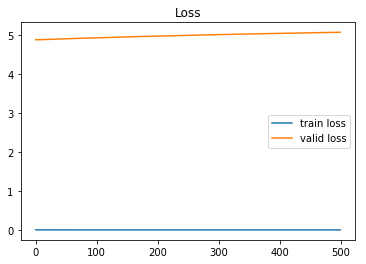

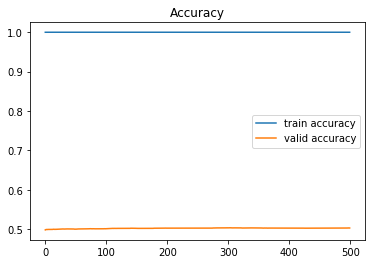

In [15]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend(loc='best')
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend(loc='best')
plt.title("Accuracy")
plt.show()